# 任务：使用朴素贝叶斯过滤垃圾邮件。

## 1、加载数据

In [7]:
import re


# 切割分类文本
def textParse(bigString):
    listOfTokens = re.split("\W+", bigString)
    return [tok.lower() for tok in listOfTokens if len(tok) > 2]

In [8]:
docList = []
classList = []
fullText = []

# 每次访问一条RSS源
for i in range(1, 26):
    wordList = textParse(
        open("./data/email/ham/{}.txt".format(i), "r", encoding="ISO-8859-1").read()
    )
    docList.append(wordList)
    classList.append(1)  # NY is class 1
    wordList = textParse(
        open("./data/email/spam/{}.txt".format(i), "r", encoding="ISO-8859-1").read()
    )
    docList.append(wordList)
    classList.append(0)
for i in range(len(docList)):
    docList[i] = " ".join(docList[i])
print(wordList)

['experience', 'with', 'biggerpenis', 'today', 'grow', 'inches', 'more', 'the', 'safest', 'most', 'effective', 'methods', 'of_penisen1argement', 'save', 'your', 'time', 'and', 'money', 'bettererections', 'with', 'effective', 'ma1eenhancement', 'products', 'ma1eenhancement', 'supplement', 'trusted', 'millions', 'buy', 'today']


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(docList, classList, test_size=0.2)
vec = CountVectorizer()
# 用fit_ trainsform先对文本拟合再将其转换为向量
X_train = vec.fit_transform(x_train)
X_test = vec.transform(x_test)

## 2、训练模型

In [10]:
# 使用朴素贝叶斯训练模型：
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

## 3、评估模型

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("confusion_matrix:")
cm = confusion_matrix(y_test, pred)
print(cm)
print("classification report")
cr = classification_report(y_test, pred)
print(cr)
print("accuracy_score:%.3f" % accuracy_score(y_test, pred))

confusion_matrix:
[[5 0]
 [0 5]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

accuracy_score:1.000


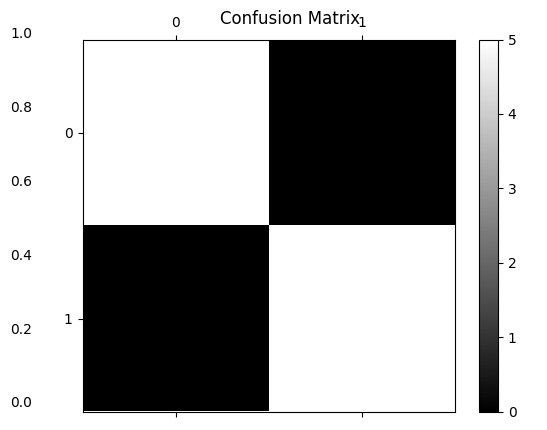

In [12]:
import matplotlib.pyplot as plt

plt.title("Confusion Matrix")
ax = plt.gca()
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines["bottom"].set_color("none")
ax.spines["left"].set_color("none")
ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("none")
ax.set_xticklabels([])
ax.set_xticklabels([])
plt.matshow(cm, fignum=1, cmap="gray")
plt.colorbar()